### Anotações sobre o livro *Master Machine Learning Algoritms* versão 2017 ([link aqui](https://machinelearningmastery.com/master-machine-learning-algorithms/))

# Capítulo 10 - Regressão linear

* Regressão linear é um dos algoritmos mais estudados e entendidos em estatística e aprendizado de máquina.
* Regressão linear foi desenvolvida dentro de estatística e estudado como um modelo para entender a relação entre variáveis numéricas de entrada (input) e de saida (output).
* Regressão linear é um modelo linear, assume uma relação linear entre as variáveis de *input* ($x$) e de *outputs* ($y$). Mais específico, que $y$ pode ser calculado por uma combinação linear de *inputs* ($x$).
* Quando existe penas uma variável ($x$), o método é referido como **regressão linear simples** e quando há múltiplas variáveis de input, é referido como **regressão linear múltipla**.
* Diferentes técnicas podem ser usadas para treinar a equação de regressão linear dos dados, sendo o mais comum chamado *Ordinary Least Squares*. É comum se referir ao modelo preparado por essa metodologia como *Ordinary Least Squares Linear Regression* ou somente *Least Squares Regression*.

## Representação

$y = \beta0 + \beta1 \times x$

* A equação linear atribui um fator de escala para cada valor/coluna, chamado coeficiente ($\beta$)
* Outro coeficiente é o *intercept* ou coeficiente de viés que dá a linha um certo grau de liberdade (ex.: movendo para cima ou para baixo no gráfico bi-dimensional).
* Em altas dimensões nós temos mais de um *input* ($x$), sendo a linha chamada de plano ou hiper-plano.
* Quando o coeficiente de viés ($\beta1$) é zero ele remove a influência do da variável de entrada do modelo e assim da predição feita pelo modelo ($0 \times x = 0$). Isso se torna relevante se olhar para os métodos de **regularização** que mudam o algoritmo de aprendizado para reduzir a complexidade do modelo de regressão botando pressão no tamanho absoluto dos coeficientes, direcionando algum para zero.

## Modelos

* Aprender um modelos de regressão linear significa estimar os valores dos coeficientes usados na representação com os dados disponíveis.
* Existem diversas técnincas, segue alguns exemplos:

### 1. Regressão linear simples

* Com regressão linear simples quando tempos um dado de entrada simples podemos usar estatística para estimar os coeficientes. Assim é preciso calcular algumas propriedades estatísticas como média, desvios padrões, correlações e covariações. Além disso, todo o dado precisa estar disponível para examinar e calcular estatísticas.

### 2. *Ordinary Least Squares* (mais usado)

* Nós usamos quando temos mais de uma variável de entrada. Esse método procura minimizar a soma dos quadrados dos resíduos.
* Isso significa que dados uma linha de regressão sobre os dados nós calculamos a distância de cada ponto para a linha de regressão, eleva ao quadrado e soma todos eles (erros ao quadrado).
* Esse método trata os dados como uma matrix e usa operações de algebra linear para estimar os valores ótimos para os coeficientes. Então é preciso que todo o dado esteja disponível e que tenha memória suficiente para ajustar os dados e realizar as operações sobre a matrix.

## *Gradient Descent*

* Quando se tem um ou mais dados de entrada você pode usar um processo de otimização dos valores de coeficiente, para isso se itera minimizando o erro do modelo nos dados de treinamento.
* Isso se chama *Gradient Descent* e funciona começando com cada coeficiente valendo zero. A soma dos erros ao quadrado é calculado para cada dado de entrada e de saída. Uma *taxa de aprendizado* (fixada) é usada como um fator escalar e os coeficientes são atualizados em direção de diminuir o erro. Esse processo é repetido ate que se minimize a soma dos erros ou caso não se obtenha mais melhoras desses valores.
* Na prática é útil quando se tem grandes dados que não caibam na memória.

### 1. Regressão linear regularizada

* Existem extensões do treinamento de modelos lineares chamados de métodos de regularização.
* Esses tentam tanto minimizar a soma dos erros ao quadrado do modelo nos dados de treinamento (usando *Ordinary Least Squares*) mas também diminuir a complexidade do modelo (como um número ou tamanho absoluto da soma de todos os coeficientes no modelo).
* Dois exemplos são:

#### a) Regressão de Lasso (L1):
> Onde o *Ordinary Least Squares* é modificado para também minimizar a soma absoluta dos coeficientes.

#### b) Regressão de Ridge (L2):
> Onde o *Ordinary Least Squares* é modificado para também minimizar o quadrado da soma absoluta dos coeficientes.

* Esses métodos são eficazes quando há colinearidade nos seus daddos e o *Ordinary Least Squares* poderia ter *overfit* nos dados de treinamento.

## Fazendo predição com regressão linear

* Imagine que estamos predizendo peso ($y$) a partir da altura ($x$).

$peso = \beta0 + \beta1 \times altura$

> One $\beta0$ é o coeficiente de viés e $\beta1$ é o coeficiente dos dados de altura.

* Nós usamos uma **técnica de aprendizado** para encontrar os valores de coeficiente. Uma vez encontrado, o peso pode ser calculado para uma determinada altura. Por exemplo:

In [1]:
def lr(beta0, beta1, x):
    ''' Formula para regressao linear'''
    y = beta0 + beta1 * x
    return y

beta0 = 0.1
beta1 = 0.5
alt = 182
peso = lr(beta0, beta1, alt)
peso

91.1

* Podemos ver que o resultado da equação pode ser mostrado num gráfico bi-dimensional. Vamos calcular para uma altura entre 100 e 250 cm e criar uma linha com o resultado dos pesos.

In [2]:
alt_lst = [100, 110, 120, 130, 150, 160, 170, 185, 192, 200, 220, 230, 240, 250]
pes_lst = []
for alt in alt_lst:
    pes_lst.append(lr(beta0, beta1, alt))
pes_lst

[50.1,
 55.1,
 60.1,
 65.1,
 75.1,
 80.1,
 85.1,
 92.6,
 96.1,
 100.1,
 110.1,
 115.1,
 120.1,
 125.1]

In [3]:
from matplotlib import pyplot as plt

plt.scatter(alt_lst, pes_lst, c='r', label='dados')
plt.plot(alt_lst, pes_lst, label='linha de regressão')
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.xlim(0, 300)
plt.ylim(0, 140)
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

## Preparando dados para regressão linear

* Seguem algumas dicas, tenta usar diferentes preparações e veja o que da certo para o seu problema:

### 1. Suposição linear:
> Regressão linear assumi que a relação entre os dados de entrada e saída é linear, não suportando nada além disso. Talvez vocẽ precise transformar seus dados para que a relação se torne linear (ex.: $log$ transforma numa relação exponencial)

### 2. Remover ruídos:
> Regressão linear assume que seus dados de entradas e saída não são ruídos. Considere usar operações de limpeza de dados para expor e clarear os sinaris dos seus dados.

### 3. Remover colinearidade:
> Overfit pode acontecer na regressão linear quando se tem dados de entrada com altos índices de correlação. Considere calcular correlação de pares para os seus dados de entrada e remover os mais corretalos. ([mais aqui](http://www.portalaction.com.br/analise-de-regressao/36-analise-de-colinearidade-e-multicolinearidade))

### 4. Distribuições Gaussianas:
> Regressões lineares fazer predições mais acuradas quando os dados de entrada e saída possuem uma distribuição Gaussiana. Vocẽ pode obter algum transformando (ex.: log ou BoxCox) seus dados para que aparentem mais Gaussianas ([mais aqui](http://www.portalaction.com.br/analise-de-regressao/31-diagnostico-de-normalidade)).

### 5. Reescalar *inputs*:
> Regressão linear normalmente fazem predições mais acuradas quando os dados de entrada são reescalados usando padronização ou normalização.

----

# Capítulo 11: Tutorial de regressão linear simples 

* Usando regressão linear simples

In [4]:
import pandas as pd

x_lst = [1, 2, 4, 3, 5]
y_lst = [1, 3, 3, 2, 5]
df = pd.DataFrame(list(zip(x_lst, y_lst)),
                 columns=['x', 'y'])
df


,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


* A coluna $x$ são os dados de entrada e $y$ os de saída
* Segue um gráfico de distribuição dos dados (scatter):

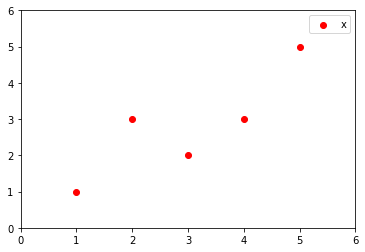

In [5]:
plt.scatter(df['x'], df['y'], c='r', label='Dados')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend('x versus y')
plt.show()

* É possível perceber uma possível relação linear entre $x$ e $y$

### Regressão linear simples

* Quando temos apenas um atributo de entrada ($x$), caso tivessemos múltiplos atributos ($x_1, x_2, x_3, ... , x_n$) teriamos uma *regressão múltipla*.

* Usaremos a função criada anteriormente (`lr`), mas agora teremos que calcular os valores de $\beta0$ (***intercept***) e $\beta1$ (***slope***)

> a) ***intercept*** ou **viés**, chamado assim porque ele determina onde a linha intercepta o eixo y, **viés** porque é adicionado para compensar todas as predições.

> b) ***slope***, chamado assim porque define a inclinação da linha ou como $x$ se traduz em $y$ antes de adicionar o **viés**.

* O objetivo é encontrar os melhores estimadores para os coeficientes minimizarem os erros na predição de $y$ dado $x$. Podemos estimar os coeficientes através de:

$\beta1 = \frac{\sum_{i=1}^{n}(x_i - mean(x)) \times (y_i - mean(y))}{\sum_{i=1}^{n}(x_i - mean(x))^2}$

$\beta0 = mean(y) - \beta1 \times mean(x)$

In [6]:
x_mean = df['x'].mean()
y_mean = df['y'].mean()
df['x_minus_mean'] = df['x'].apply(lambda x: x - x_mean)
df['y_minus_mean'] = df['y'].apply(lambda y: y - y_mean)
df['multiplication'] = df['x_minus_mean'] * df['y_minus_mean']
df['squared'] = df['x_minus_mean'] ** 2
b1 = df['multiplication'].sum() / df['squared'].sum()
b0 = y_mean - b1 * x_mean
print('beta1 = %s' % b1)
print('beta0 = %s' % b0)

beta1 = 0.8
beta0 = 0.39999999999999947


In [7]:
# Predictions
df['y_predicted'] = df['x'].apply(lambda x: lr(b0, b1, x))
df

,x,y,x_minus_mean,y_minus_mean,multiplication,squared,y_predicted
0,1,1,-2.0,-1.8,3.6,4.0,1.2
1,2,3,-1.0,0.2,-0.2,1.0,2.0
2,4,3,1.0,0.2,0.2,1.0,3.6
3,3,2,0.0,-0.8,-0.0,0.0,2.8
4,5,5,2.0,2.2,4.4,4.0,4.4


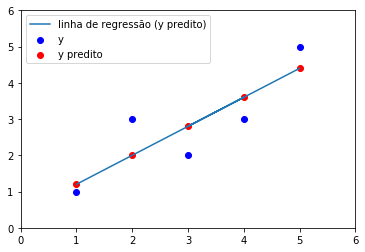

In [8]:
# Plot
plt.scatter(df['x'], df['y'], c='b', label='y')
plt.scatter(df['x'], df['y_predicted'], c='r', label='y predito')
plt.plot(df['x'], df['y_predicted'], label='linha de regressão (y predito)')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()
plt.show()

# Estimando erro

* Podemos calcular os valores de erro das nossas predições, chamado *Root Mean Squared Error* (RMSE)

$RMSE = \sqrt{\frac{\sum_{i=1}^{n}(p_i - y_i)^2}{n}}$

In [9]:
import numpy as np

df['predicted_minus_y'] = df['y_predicted'] - df['y']
df['predicted_minus_y_squared'] = df["predicted_minus_y"] **2
rmse = np.sqrt(df['predicted_minus_y_squared'].sum() / df.shape[0])
rmse

0.692820323027551

# Dica

* Segue uma dica para o cálculo de $\beta1$:

$\beta1 = corr(x,y) \times \frac{stdev(y)}{stdev(x)}$

* Onde $corr(x,y)$ é a correlação entre $x$ e $y$, conhecido como coeficiente de correlação de *Pearson*, é uma medida de como relacionado estão duas variáveis dentro de $-1$ e $1$.

> Um valor de $1$ indica que as duas variáveis estão perfeitamente correlacionadas positivamente, as duas movem na mesma direção. Um valor de $-1$ indica que elas estão perfeitamente correlacionadas negativamente, quando uma move a outra move no sentido contrário.

* $stdev()$ é o cálculo do desvio padrão ($\sigma$) que é uma medida de o quanto o dado está fora da média. Dado por:

$\sigma = \sqrt{\frac{\sum(x - \bar{x})^2}{n}}$

> Onde $\bar{x}$ significa média

In [10]:
corr_xy = df['x'].corr(df['y'])
std_x = df['x'].std()
std_y = df['y'].std()
b1_new = corr_xy * (std_y / std_x)
b1_new

0.7999999999999999

# Capítulo 12: Tutorial usando *Gradient descent* em regressão linear simples

## *Stochastic gradient descent*

* *Gradient descent* é o processo de minimizar uma função seguindo o gradiente da função de custo. Isso envolve sabe a forma de custo assim como a derivativa, com isso um dado ponto que você saiba o gradiente e pode mover nessa direção (ex.: descida em direção ao valor mínimo).
* Podemos usar uma técnica que avalie e atualize os coeficientes em cada interação (*stochastic gradient descent*) para minimizar o erro do modelo nos nossos dados de treinamento.
* Nesse algoritmo cada instância de treinamento é mostrada para o modelo uma por vez. O modelo faz a predição para uma instância do dado de treinamento, o erro é calculado e o modelo atualiza para reduzir o erro da próxima predição.
* Esse processo pode ser usado para encontrar o arranjo de coeficientes que resulta no menor erro para o modelo nos dados de treinamento. Cada interação o coeficiente $w$ do inglẽs *weights* (pesos) é atualizado de acordo com:

$w = w - alpha \times delta$

> Onde $w$ é o coeficiente ou peso sendo otimizado, $alpha$ a taxa de aprendizado que você deve fixar (ex.: 0.1) e $delta$ o erro para o modelo nos dados de treinamento atribuído ao peso.

## Regressão linear simples com *gradient descent* estocástico

* *Gradient descent* estocástico não é usado para calcular os coeficientes de regressões lineares na prática a não ser que seja o *Ordinary Least Squares* para grandes dados. Sendo assim, esse exemplo é apenas didático.
* Como visto ateriormente o modelo de regressão linear é definido por:

$y = \beta0 + \beta1 \times x$

### Interação com o *gradient descent*

* Vamos começar com os coeficientes fixados em zero:

In [11]:
b0, b1 = 0, 0

* Nos podemos calcular o erro da predição por:

$error = p(i) - y(i)$

> Onde $p(i)$ é a predição do item $i$ nos dados e $y(i)$ é o item $i$ para os dados de saída ($y$) nos nossos dados.

* Agora podemos calcular a predição para o nosso primeiro dado, $x = 1$ e $y = 1$.

In [12]:
x, y = 1, 1
p = b0 + b1 * x
p

0

* Usado o dados de predição podemos calcular o erro:

In [13]:
error = (p - y)
error

-1

* Podemos então usar esse erro para a equação de *gradient descent* atualizar os pesos.
* Começaremos pelo *intercept* ($\beta0$) por ser mais fácil.
* Podemos dizer que $\beta0$ é culpado por todo erro, isso quer dizer que atualizando o peso irá usar apenas o erro como gradiente. O cálculo de $\beta0$ é feito por:

$\beta0(t + 1) = \beta0(t) - alpha \times error$

> Onde $\beta0(t + 1)$ é a versão atualizada do coeficiente que usaremos na próxima instância de treinamento. O $\beta0(t)$ é o valor de $\beta0$ corrente, $alpha$ a taxa de aprendizado fixada e $error$ o erro que calculamos para a instância em questão.

* Vamos fixar a taxa de aprendizado ($alpha$) em 0.01, então o novo valor de $\beta0$ será:

In [14]:
alpha = 0.01
new_b0 = b0 - alpha * error
new_b0

0.01

* Usamos a mesma equação para atualizar $\beta1$, mas com uma pequena adição. O erro é filtrado pelo dado de entrada que o causou:

$\beta1(t + 1) = \beta1(t) - alpha \times error \times x$

* O novo $\beta1$ é:

In [15]:
new_b1 = b1 - alpha * error * x
new_b1

0.01

* Terminamos a primeira interação, esse processo deve ser repetido para as outras instâncias pelo menos umas 4 vezes nos nossos dados.

In [16]:
def calc_coef(b0, b1, alpha, error, x):
    ''' Calcula os novos valores para b0 e b1 '''
    new_b0 = b0 - (alpha * error)
    new_b1 = b1 - (alpha * error * x)
    return new_b0, new_b1

# Constantes e inicializações
k = 4
alpha = 0.01
b0, b1 = 0, 0
new_df = df[['x', 'y']].copy()
val_dict = {
    'b0': [], 'b1': [], 'error': []
}

# Interação mínima indicada
for i in range(k):
    for index, row in new_df.iterrows():
        # variável com a última predição
        predicted = lr(b0, b1, row['x'])
        # adicioner erro e novos valores de b0 e b1 para plots
        val_dict['error'].append(predicted - row['y'])
        error = predicted - row['y']
        b0, b1 = calc_coef(b0, b1, alpha, error, row['x'])
        val_dict['b0'].append(b0)
        val_dict['b1'].append(b1)
print('b0: %s, b1: %s' % (b0, b1))
# adicionar predição ao new_df
new_df['y_predicted'] = new_df['x'].apply(lambda x: lr(b0, b1, x))
new_df

b0: 0.23089749104812557, b1: 0.7904386101794071


,x,y,y_predicted
0,1,1,1.021336
1,2,3,1.811775
2,4,3,3.392652
3,3,2,2.602213
4,5,5,4.183091


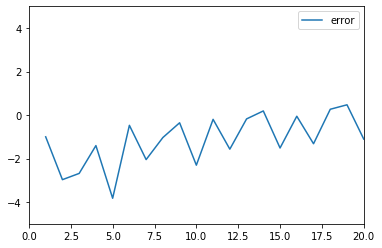

In [17]:
plt.plot(range(1, 21), val_dict['error'], label='error')
plt.xlim(0, 20)
plt.ylim(-5, 5)
plt.legend()
plt.show()

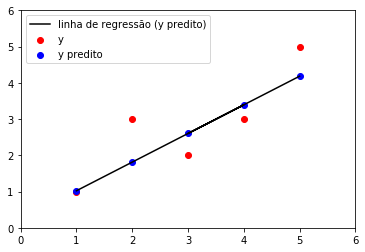

In [18]:
plt.scatter(new_df['x'], new_df['y'], c='r', label='y')
plt.scatter(new_df['x'], new_df['y_predicted'], c='b', label='y predito')
plt.plot(new_df['x'], new_df['y_predicted'], c='black', label='linha de regressão (y predito)')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.legend()
plt.show()

* Podemos também calcular o *RMSE* para essas predições:

In [19]:
new_df['predicted_minus_y'] = new_df['y_predicted'] - df['y']
new_df['predicted_minus_y_squared'] = new_df["predicted_minus_y"] **2
rmse = np.sqrt(new_df['predicted_minus_y_squared'].sum() / new_df.shape[0])
rmse

0.7206264014789554

* Com esse resultado de *RMSE* fica claro que o *gradient descent* não ajudou em nada, sendo somente indicado quando métodos analíticos não podem ser usados (para grande dados)